## Final Project Submission

Please fill out:
* Student name: Olivia Lo
* Student pace: part time 041519
* Scheduled project review date/time: TBC
* Instructor name: Victor
* Blog post URL: TBC

In [2]:
# working with Pandas Dataframes throughout the project 
import pandas as pd
import numpy as np

# for data visualiazation
import seaborn as sns
from seaborn import lmplot

import statsmodels as sm

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates

In [3]:
# import the dataframe
df = pd.read_csv('kc_house_data.csv','r', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# to import column name descriptions included within project
from IPython.display import display, Markdown

# using Ipython.display to read and display different file  
# from project folder within this notebook
with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [5]:
# to understand how many rows of data there are
print(len(df))

21597


In [6]:
# to understand the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.5+ MB


In [12]:
# replace missing value with 0 in view category
df['view'].fillna(0,inplace=True)

In [13]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [14]:
df['view'].isnull().sum()

0

In [51]:
df['view'] = df['view'].astype(int)

In [15]:
# replace missing value with 0 in yr_renovated category
df['yr_renovated'].fillna(0,inplace=True)

In [58]:
df['yr_renovated'].isnull().sum()

0

In [57]:
# change the category into a boolean to show if they are renovated
df['yr_renovated'] = df['yr_renovated'].astype(bool)
df['renovated'] = df['yr_renovated']

In [56]:
df['yr_renovated'].value_counts().head()

False    20420
True       723
Name: yr_renovated, dtype: int64

In [59]:
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [28]:
# change the category into a boolean to show whether they have waterfront
df['waterfront'] = df['waterfront'].astype('bool')

In [29]:
df['waterfront'].value_counts().head()

False    19075
True      2522
Name: waterfront, dtype: int64

In [33]:
df = df[df.sqft_basement != '?']

In [34]:
df['sqft_basement'].value_counts().head()

0      12826
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

In [54]:
df['sqft_basement'] = df['sqft_basement'].astype(int)

In [40]:
# to drop column longitute and latitutde
to_drop = ["lat","long"]
df.drop(to_drop, axis=1, inplace=True)

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,True,0,3,7,1180,0,1955,0,98178,1340,5650,False
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,0,3,7,2170,400,1951,1,98125,1690,7639,True
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,0,3,6,770,0,1933,0,98028,2720,8062,False
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,0,5,7,1050,910,1965,0,98136,1360,5000,False
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,0,3,8,1680,0,1987,0,98074,1800,7503,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null int64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null bool
view             21143 non-null int32
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null int32
yr_built         21143 non-null int64
yr_renovated     21143 non-null int32
zipcode          21143 non-null int64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
renovated        21143 non-null bool
dtypes: bool(2), float64(2), int32(3), int64(12), object(1)
memory usage: 2.9+ MB


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

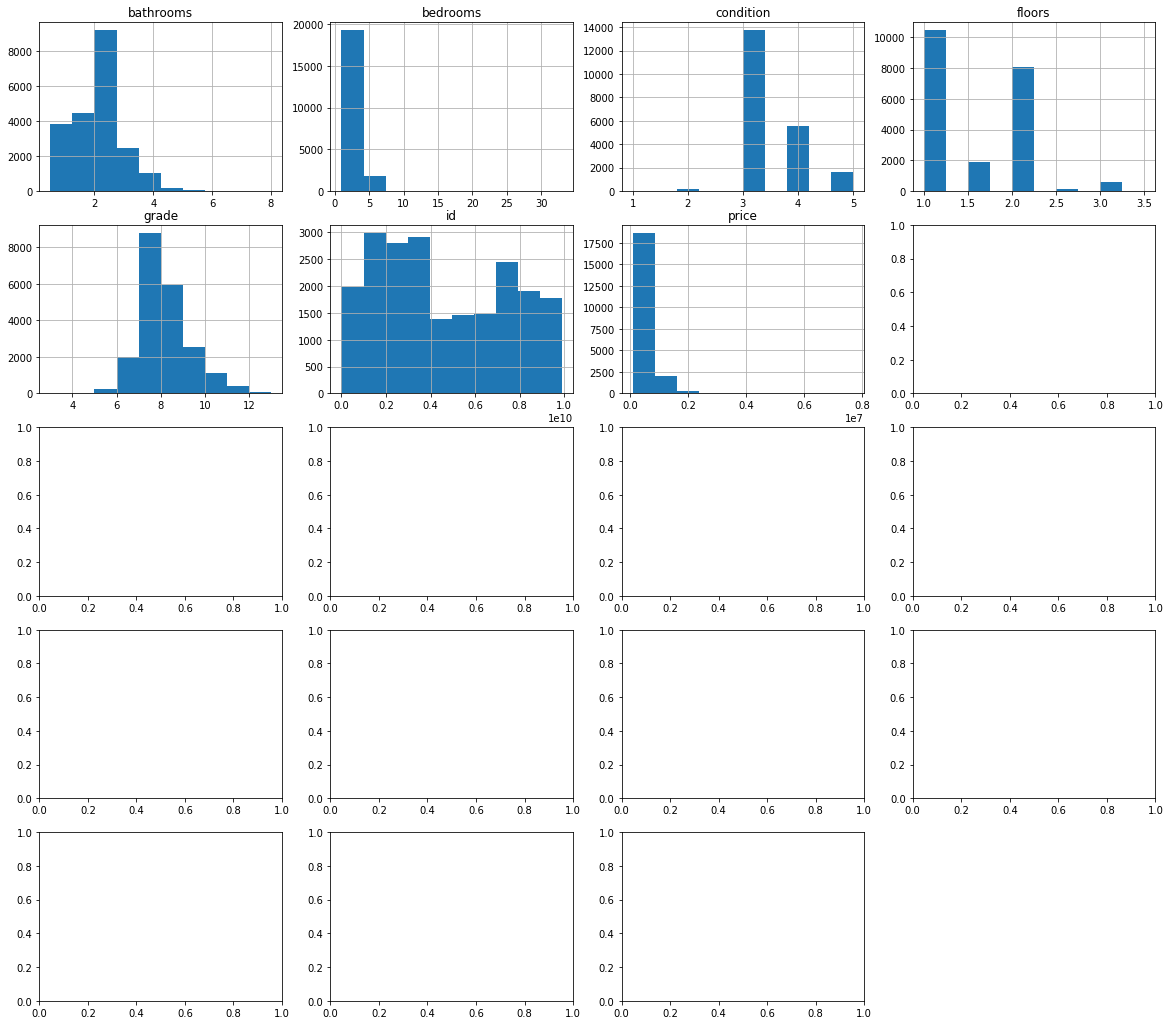

In [62]:
df.hist(figsize = (20,18));

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


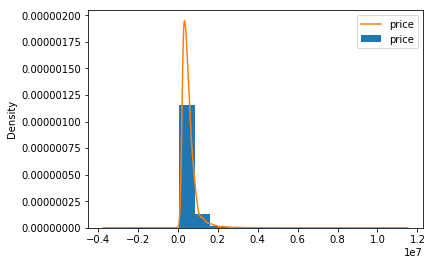

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


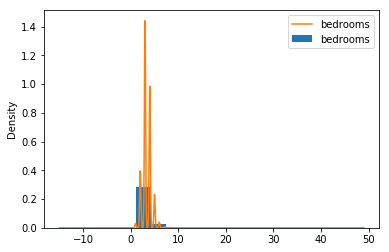

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


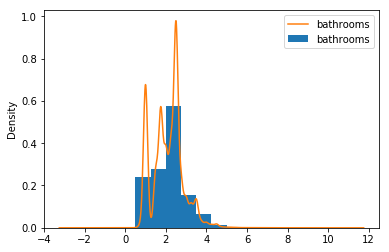

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


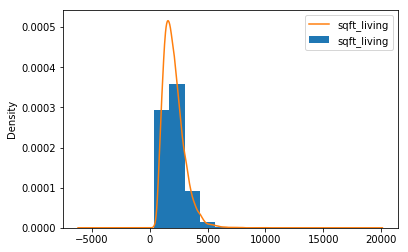

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


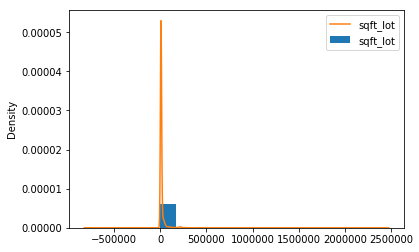

C:\Users\Olivia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


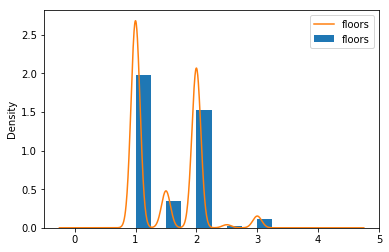

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [66]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

In [ ]:
# scatter plot
# binning categorial data
# create dummy variables
# reimport dataframe with dummy variables
# scatter matrix
# correlation matrix and remove highly correlated variables
# reimport dataframe with dummy variables and without the highly correlated variables
# histograms for continuous variables
# perform log transformation
# run linear model in statsmodel and scikit-learn

